Accuracy: 0.4
              precision    recall  f1-score   support

           0       0.20      0.11      0.14         9
           1       0.47      0.64      0.54        11

    accuracy                           0.40        20
   macro avg       0.33      0.37      0.34        20
weighted avg       0.35      0.40      0.36        20



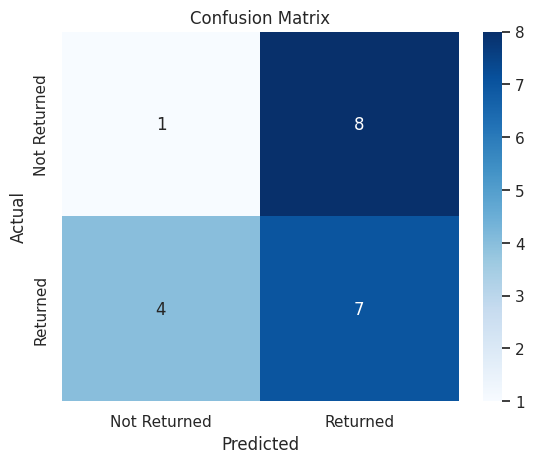

In [7]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data
df = pd.read_csv("/content/product_return.csv")
df['returned'] = LabelEncoder().fit_transform(df['returned'])  # yes=1, no=0

# Define features and label
X = df[['purchase_amount', 'review_score', 'days_to_delivery']]
y = df['returned']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='d', xticklabels=['Not Returned', 'Returned'], yticklabels=['Not Returned', 'Returned'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
